In [2]:
import pandas as pd
epa = pd.read_csv('../datasets/epa_violations.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
epa.head(100)

,Company,Parent Company,Penalty Amount,Subtraction From Penalty,Penalty Amount Adjusted For Eliminating Multiple Counting,Penalty Year,Penalty Date,Primary Offense,Secondary Offense,Description,...,Parent Company Stock Ticker,Major Industry of Parent,Specific Industry of Parent,Info Source,Info Source Archive URL,PACER Link,Captured Document,EPA/OSHA More Info Link,Notes,penalty_amt
0,5N Plus Inc.,NaN,"$61,150",$0,"$61,150",2013,20130328,environmental violation,NaN,"A Fairfield, Conn. company that develops and p...",...,NaN,NaN,NaN,http://yosemite.epa.gov/opa/admpress.nsf/0c0af...,screenshot_99713.png,NaN,NaN,NaN,NaN,61150
1,A&L Cesspool Service Corporation,NaN,"$900,000",$0,"$900,000",2016,20161026,environmental violation,NaN,A&L Cesspool Service Corporation pled guilty a...,...,NaN,NaN,NaN,https://cfpub.epa.gov/compliance/criminal_pros...,chunk_1screenshot_734000_6334526091881956598.png,NaN,NaN,NaN,NaN,900000
2,A-1 Barrel,NaN,"$15,125",$0,"$15,125",2012,20120911,environmental violation,NaN,"A-1 Barrel Company, LLC is a used drum washing...",...,NaN,NaN,NaN,http://cfpub.epa.gov/compliance/criminal_prose...,screenshot_100029.png,NaN,NaN,NaN,NaN,15125
3,"A-1 Petroleum and Propane, Inc.",NaN,"$40,000",$0,"$40,000",2015,20151001,environmental violation,NaN,"A-1 Petroleum and Propane, Inc., located in El...",...,NaN,NaN,NaN,http://yosemite.epa.gov/opa/admpress.nsf/21b89...,screenshot_100095.png,NaN,NaN,NaN,NaN,40000
4,"A-1 Restaurant Services, L.L.C.",NaN,"$200,000",$0,"$200,000",2016,20151119,environmental violation,NaN,NaN,...,NaN,NaN,NaN,https://cfpub.epa.gov/compliance/criminal_pros...,screenshot_194821.png,NaN,NaN,NaN,NaN,200000
5,AAA Plating and Inspection,NaN,"$74,000",$0,"$74,000",2012,20120910,environmental violation,NaN,The U.S. Environmental Protection Agency annou...,...,NaN,NaN,NaN,http://yosemite.epa.gov/opa/admpress.nsf/79c09...,screenshot_99773.png,NaN,NaN,NaN,NaN,74000
6,Aapex Environmental,NaN,"$138,200",$0,"$138,200",2012,20120322,environmental violation,NaN,Aapex Environmental allegedly discharged asbes...,...,NaN,NaN,NaN,http://cfpub.epa.gov/compliance/criminal_prose...,screenshot_100011.png,NaN,NaN,NaN,NaN,138200
7,"Abilene Products Co., Inc.",NaN,"$90,660",$0,"$90,660",2013,20130814,environmental violation,NaN,"Abilene Products Co., Inc., has agreed to pay ...",...,NaN,NaN,NaN,http://yosemite.epa.gov/opa/admpress.nsf/0c0af...,screenshot_99673.png,NaN,NaN,NaN,NaN,90660
8,Action Manufacturing Company,Action Manufacturing,"$1,200,000",$0,"$1,200,000",2014,20140521,environmental violation,NaN,"Action Manufacturing Company, headquartered in...",...,NaN,aerospace and military contracting,aerospace & military contracting,http://www.justice.gov/usao-edpa/pr/company-pl...,screenshot_139.png,NaN,NaN,NaN,NaN,1200000
9,Adams Land and Cattle Company,NaN,"$145,000",$0,"$145,000",2012,20120710,environmental violation,NaN,"Adams Land and Cattle Company, a beef feedlot ...",...,NaN,NaN,NaN,http://yosemite.epa.gov/opa/admpress.nsf/0/F8C...,screenshot_93.png,NaN,NaN,NaN,NaN,145000


In [3]:
cols = [col for col in epa.columns]
penalty_amt = 'Penalty Amount Adjusted For Eliminating Multiple Counting'

# create a new row with penalty amount as int
penalty_int = [int(entry.replace('$', '').replace(',','')) for entry in epa[penalty_amt]]
epa['penalty_amt'] = penalty_int

In [4]:
cols_of_interest = ['penalty_amt', 'Company', 'Parent Company', 'Parent Company Stock Ticker', 'Penalty Year', 'Penalty Date']

In [5]:
# create a new dataframe only with the above columns
epa_cols_interest = epa[cols_of_interest].copy()

In [6]:
# drop NaN rows and reindex our table
epa_cols_interest = epa_cols_interest.dropna()
epa_cols_interest = epa_cols_interest.reset_index()

In [ ]:
# sort by highest fine
# epa_cols_interest.sort_values(by=['Parent Company Stock Ticker'], ascending=False)
epa_cols_interest.sort_values(by=['penalty_amt'], ascending=False)

In [ ]:
# TODO:
#   split fines by parent company
#   order fines by year





In [8]:
# get unique stock tickers and group fines by company
unique_tickers = epa_cols_interest['Parent Company Stock Ticker'].unique()
unique_years = epa_cols_interest['Penalty Year'].unique()

#
fine_by_year = []
for year in unique_years:
    epa_years = epa_cols_interest[epa_cols_interest['Penalty Year'] == year]
    fine_by_year += [(sum(epa_years['penalty_amt']), year)]

In [9]:
# set x and y axis before plotting

sorted_fines = sorted(fine_by_year, key = lambda x: x[1])
x_axis = [year for _,year in sorted_fines]
y_axis = [fine for fine,_ in sorted_fines]

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

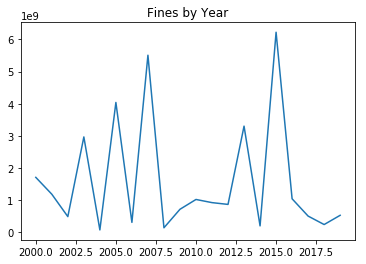

In [12]:
# plot the data

plt.plot(x_axis, y_axis)
plt.title('Fines by Year')
plt.show()

<h1> not really running this </h1>

In [13]:
sd = epa_cols_interest['penalty_amt'].std()
avg = epa_cols_interest['penalty_amt'].mean()

In [14]:
#normalize values
z_score = lambda x: ((x - avg) / float(sd))

epa_cols_interest['normalized_amt'] = [z_score(val) for val in epa_cols_interest['penalty_amt']]

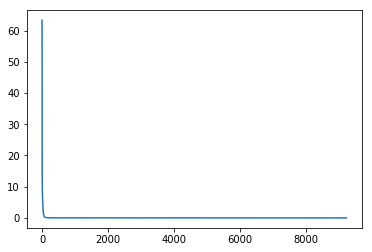

In [16]:
test_set = sorted(epa_cols_interest['normalized_amt'])[::-1]
test_set

plt.plot(test_set)
plt.show()